In [1]:
import pandas as pd
import os

# Load the provided CSV file to inspect its contents
path = os.path.join('..','results','merged_data.csv')
data = pd.read_csv(path)

# Get an initial idea of the structure of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007123 entries, 0 to 1007122
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Time stamp  1007123 non-null  object
 1   Value       1007123 non-null  object
 2   Variable    1007123 non-null  object
dtypes: object(3)
memory usage: 23.1+ MB


In [2]:
# Print the first 5 rows of the dataset
data.head()

,Time stamp,Value,Variable
0,07/07/2023 10:41:03,"491,00",TR2_Pot_att
1,07/07/2023 10:26:03,"498,00",TR2_Pot_att
2,07/07/2023 10:11:03,"498,00",TR2_Pot_att
3,07/07/2023 09:56:03,"538,00",TR2_Pot_att
4,07/07/2023 09:41:03,"505,00",TR2_Pot_att


Preprocessing the data

In [3]:
# Parsing 'Time stamp' into a datetime object
data['Time stamp'] = pd.to_datetime(data['Time stamp'], format='%d/%m/%Y %H:%M:%S')

# Converting 'Value' column to numerical format, replacing dots with nothing, commas with dots
data['Value'] = data['Value'].str.replace('.','',regex=False).str.replace(',', '.').astype(float)

# Display the updated dataframe to confirm changes
data.head()


,Time stamp,Value,Variable
0,2023-07-07 10:41:03,491.0,TR2_Pot_att
1,2023-07-07 10:26:03,498.0,TR2_Pot_att
2,2023-07-07 10:11:03,498.0,TR2_Pot_att
3,2023-07-07 09:56:03,538.0,TR2_Pot_att
4,2023-07-07 09:41:03,505.0,TR2_Pot_att


In [4]:
# Calculating the median value for each variable
median_values = data.groupby('Variable')['Value'].median()

# Merging the median values with the original data for comparison
data_with_median = data.merge(median_values, on='Variable', suffixes=('', '_median'))

# Calculating the deviation from the median for each data point
data_with_median['Deviation_from_Median'] = data_with_median['Value'] - data_with_median['Value_median']

# Displaying the updated dataframe with median values and deviations
data_with_median.head()

,Time stamp,Value,Variable,Value_median,Deviation_from_Median
0,2023-07-07 10:41:03,491.0,TR2_Pot_att,408.0,83.0
1,2023-07-07 10:26:03,498.0,TR2_Pot_att,408.0,90.0
2,2023-07-07 10:11:03,498.0,TR2_Pot_att,408.0,90.0
3,2023-07-07 09:56:03,538.0,TR2_Pot_att,408.0,130.0
4,2023-07-07 09:41:03,505.0,TR2_Pot_att,408.0,97.0


/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


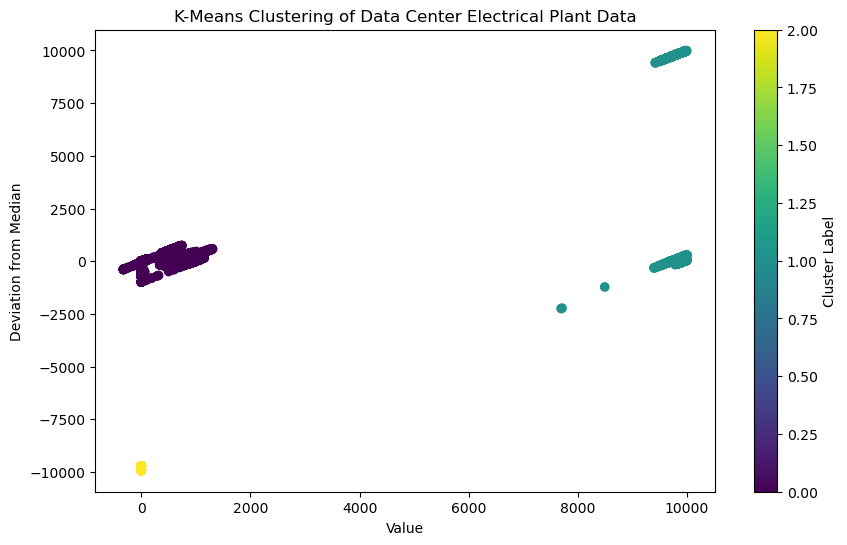

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting features for clustering
features = data_with_median[['Value', 'Deviation_from_Median']]

# Applying K-Means clustering
# Starting with an arbitrary number of clusters, say 3
kmeans = KMeans(n_clusters=3, random_state=0).fit(features)

# Adding the cluster labels to the dataframe
data_with_median['KMeans_Cluster'] = kmeans.labels_

# Plotting the results of K-Means clustering
plt.figure(figsize=(10, 6))
plt.scatter(data_with_median['Value'], data_with_median['Deviation_from_Median'], c=data_with_median['KMeans_Cluster'])
plt.title('K-Means Clustering of Data Center Electrical Plant Data')
plt.xlabel('Value')
plt.ylabel('Deviation from Median')
plt.colorbar(label='Cluster Label')
plt.show()